# Brazilian E-Commerce Public Dataset by Olist

This dataset was generously provided by Olist, the largest department store in Brazilian marketplaces. Olist connects small businesses from all over Brazil to channels without hassle and with a single contract. Those merchants are able to sell their products through the Olist Store and ship them directly to the customers using Olist logistics partners. See more on our website: www.olist.com

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

## Import Libraries and Dataset

In [170]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sp
from datetime import datetime
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
pd.options.display.float_format = '{:.2f}'.format
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [171]:
# import dataset
orders_df = pd.read_csv('C:\\Users\Sakawat Siyam\Downloads\\archive\\olist_orders_dataset.csv')
payment_df = pd.read_csv('C:\\Users\Sakawat Siyam\Downloads\\archive\\olist_order_payments_dataset.csv')
customers_df = pd.read_csv('C:\\Users\Sakawat Siyam\Downloads\\archive\\olist_customers_dataset.csv')


In [172]:
orders_df.info()
payment_df.info()
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  obje

### Now we start the data cleaning

In [173]:
# check the duplicates values
orders_df.duplicated().sum()

0

In order dataframe there are no duplicates value

In [174]:
# check the null value
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Here we find out many null value. There are almost 4908 values are missing. That way we remove these row.

In [175]:
# drop null values
orders_df = orders_df.dropna()

In [176]:
# now check the null value
orders_df.isna().sum().sum()

0

That's great. We are removing all null values

In [177]:
# now check the missing and duplicates values in customers dataframe
customers_df.isna().sum().sum()
customers_df.duplicated().sum()

0

In [178]:
# now check the missing and duplicates values in payments dataframe
payment_df.isna().sum()
payment_df.duplicated().sum()

0

There are no missing and duplicates value in customers and payments dataframe

In [179]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


Here, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date,  order_estimated_delivery_date are object type. Now we convert these column into datetime.

In [180]:
date_cols = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']
for i in date_cols:
    orders_df[i] = pd.to_datetime(orders_df[i])

In [181]:
# now check the data types
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


Now we merge two dataset order_df and customers_df on the basis of customers id

In [182]:
order_customer = orders_df.merge(customers_df,on='customer_id')
# check the new dataset
order_customer.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


Again we merge two dataset order_customer and payment_df on the basis of order_id

In [183]:
df_full = order_customer.merge(payment_df,on='order_id')
#check the new dataframe
df_full.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,credit_card,3,179.12


In [184]:
# check the df_full column information
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100739 entries, 0 to 100738
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       100739 non-null  object        
 1   customer_id                    100739 non-null  object        
 2   order_status                   100739 non-null  object        
 3   order_purchase_timestamp       100739 non-null  datetime64[ns]
 4   order_approved_at              100739 non-null  datetime64[ns]
 5   order_delivered_carrier_date   100739 non-null  datetime64[ns]
 6   order_delivered_customer_date  100739 non-null  datetime64[ns]
 7   order_estimated_delivery_date  100739 non-null  datetime64[ns]
 8   customer_unique_id             100739 non-null  object        
 9   customer_zip_code_prefix       100739 non-null  int64         
 10  customer_city                  100739 non-null  object        
 11  

### Here we get a complete dataset. Now we start analysis

Now check the order status

In [185]:
df_full['order_status'].value_counts()

delivered    100733
canceled          6
Name: order_status, dtype: int64

Here total delivered are 100733 and canceled order are 6.

Now we removing these cancelled order

In [186]:
df_full = df_full[df_full['order_status']== 'delivered']
# check the dataset
df_full['order_status'].value_counts()

delivered    100733
Name: order_status, dtype: int64

Here we have some unnecessary column. Now we remove these column

In [187]:
# check the name of all columns
column_name = df_full.columns
column_name

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

There are 6 unccessary column are order_status,order_purchase_timestamp. Now we remove these column.

In [188]:
df_full = df_full.drop(['order_status','order_purchase_timestamp'],axis=1)
df_full=df_full.drop(column_name[5:10],axis=1)
df_full

,order_id,customer_id,order_approved_at,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,sao paulo,SP,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27,barreiras,BA,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23,vianopolis,GO,1,credit_card,3,179.12
...,...,...,...,...,...,...,...,...,...
100734,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,sao jose dos campos,SP,1,credit_card,3,85.08
100735,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 13:10:37,praia grande,SP,1,credit_card,3,195.00
100736,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 15:04:16,nova vicosa,BA,1,credit_card,5,271.01
100737,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:36:21,japuiba,RJ,1,credit_card,4,441.16


In [189]:
# now we find how many state in our dataset
len(df_full['customer_state'].unique())

27

There are 27 states exits in our dataset

In [190]:
# now checking the statistical overview in payment 
df_full['payment_value'].describe()

count   100733.00
mean       153.07
std        214.47
min          0.00
25%         56.78
50%        100.00
75%        171.29
max      13664.08
Name: payment_value, dtype: float64

Here we notice that there are many outlier. now we exact out the outliers

In [191]:
Q1 = df_full['payment_value'].quantile(0.25)
Q3 = df_full['payment_value'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
out_list = df_full.index[(df_full['payment_value'] < lower_bound) | (df_full['payment_value'] > upper_bound)]
out_list = sorted(set(out_list))
print('There are ' + str(len(out_list)) + ' outliers')
print('Now lets see if we need to remove it or not')

There are 7695 outliers
Now lets see if we need to remove it or not


The following analyses are needed:

1. How many orders are placed each month (count)
2. How the daily number of orders changes over time (count)
3. How the orders are distributed by payment type (count)

The payment amount will not affect these analyses, so all orders will be included regardless of their value. However, some orders may be outliers and need to be excluded for later clustering analysis.

# Lets Drive Data Visualization

In [192]:
order_monthly = df_full[['order_approved_at']].groupby(df_full['order_approved_at'].dt.to_period('M')).agg({'order_approved_at':'count'})
order_monthly.head()

,order_approved_at
order_approved_at,
2016-10,282
2016-12,1
2017-01,763
2017-02,1735
2017-03,2708


In [193]:
#Change the column name to num_of_orders
order_monthly = order_monthly.rename(columns = {'order_approved_at': 'num_of_orders'})
#Changing order_approved_at to column, not an index
order_monthly = order_monthly.reset_index()

#adding column for month name and year 
order_monthly['month_year'] = order_monthly['order_approved_at'].dt.strftime('%b-%Y')
order_monthly.head()

,order_approved_at,num_of_orders,month_year
0,2016-10,282,Oct-2016
1,2016-12,1,Dec-2016
2,2017-01,763,Jan-2017
3,2017-02,1735,Feb-2017
4,2017-03,2708,Mar-2017


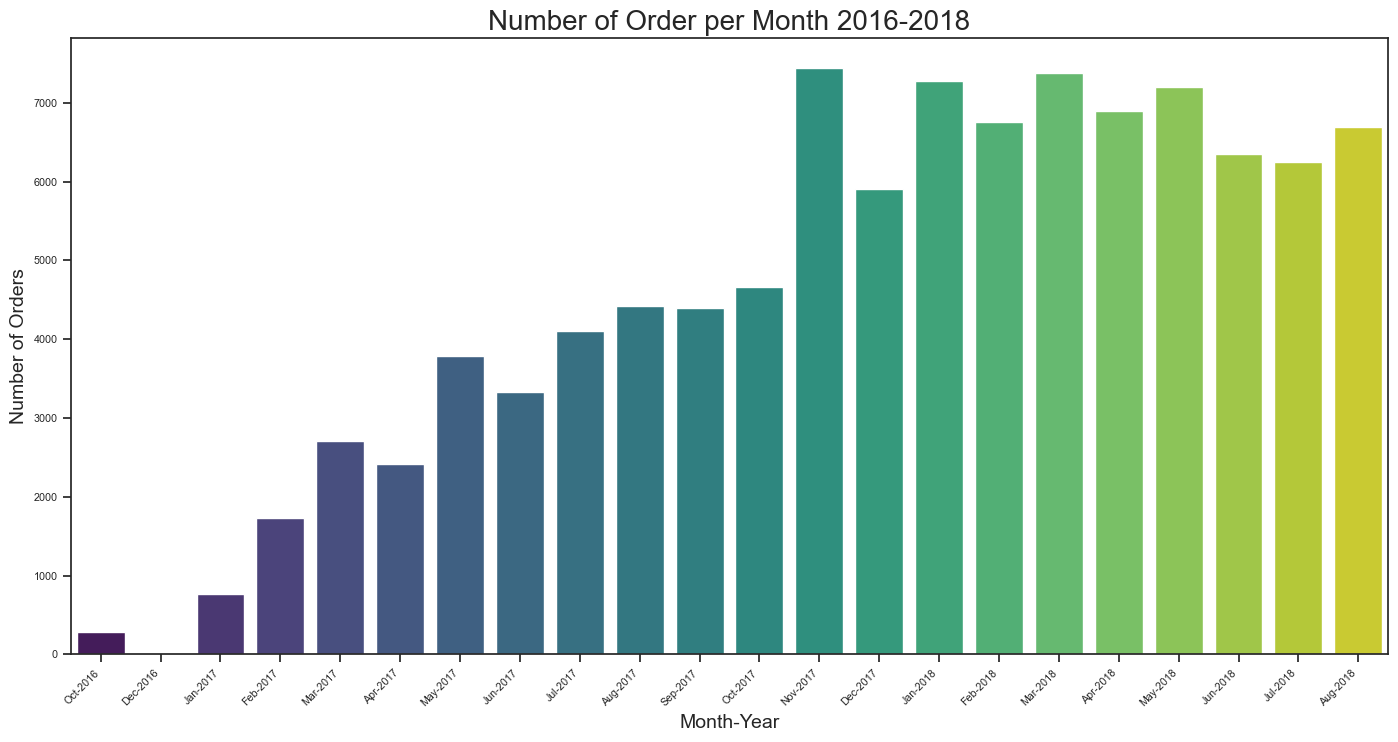

In [194]:
plt.figure(figsize=(17, 8))
sns.set_theme(style="ticks", font_scale=0.7)
order_monthly_viz = sns.barplot(x='month_year', y='num_of_orders', data=order_monthly, palette="viridis")
order_monthly_viz.set_title('Number of Order per Month 2016-2018', fontsize=20)
order_monthly_viz.set_xlabel('Month-Year', fontsize=14)
order_monthly_viz.set_ylabel('Number of Orders', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Here are some additional insights that can be drawn from the data:

1. The average number of orders filed per month increased from 2821 in 2016 to 4419 in 2017 to 6692 in 2018.
2. The median number of orders filed per month increased from 2708 in 2016 to 3788 in 2017 to 6345 in 2018.
3. increased from 1111 in 2016 to 1323 in 2017 to 1716 in 2018.

Here are some specific insights that can be drawn from the data:

1. The number of orders filed in county courts has increased by more than 130% since October 2016.
2. The largest increase in order counts occurred in August 2018, when the number of orders filed increased by over 50% from the previous month.
3. The average number of orders filed per month has increased by over 230% since October 2016.
4. The median number of orders filed per month has increased by over 130% since October 2016.
5. The standard deviation of the number of orders filed per month has increased by over 50% since October 2016.

In [195]:
def call_monthly_order(df, year, plot_type='line'):
    df_year = df[df['order_approved_at'].dt.year == year]
    df_year = df_year[['month_year', 'num_of_orders']]

    sns.set(rc={'figure.figsize': (10, 4)})
    sns.set_theme(style="ticks", font_scale=0.8)

    if plot_type == 'line':
        visualize = sns.lineplot(x='month_year', y='num_of_orders', data=df_year)
    elif plot_type == 'bar':
        visualize = sns.barplot(x='month_year', y='num_of_orders', data=df_year, palette="viridis")
    elif plot_type == 'point':
        visualize = sns.pointplot(x='month_year', y='num_of_orders', data=df_year, color='coral')
    else:
        raise ValueError("Invalid plot_type. Supported types: 'line', 'bar', 'point'")

    visualize.set_title(f'Number of Orders per Month in {year}', fontsize=17)
    visualize.set_xlabel('Month', fontsize=13)
    visualize.set_ylabel('Number of Orders', fontsize=13)

    plt.show()  # Added to display the plot immediately
    return visualize

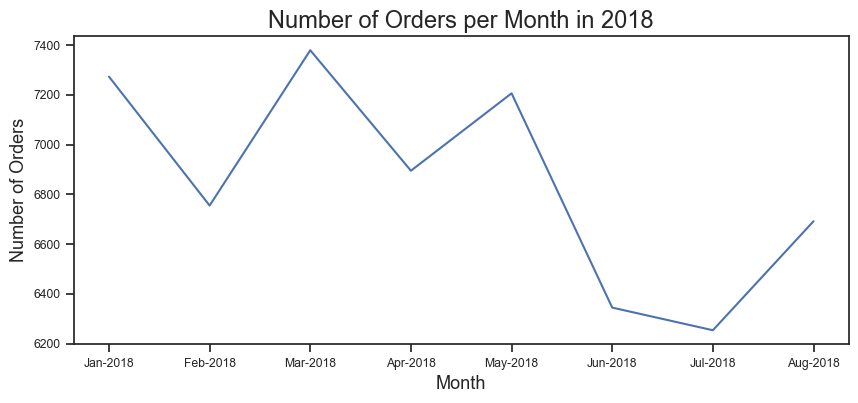

In [196]:
orders_2018 = call_monthly_order(order_monthly,2018)

This shows that the number of orders is decreasing over time. This is a negative trend, as it shows that businesses are down fall  and that consumer demand is weak.

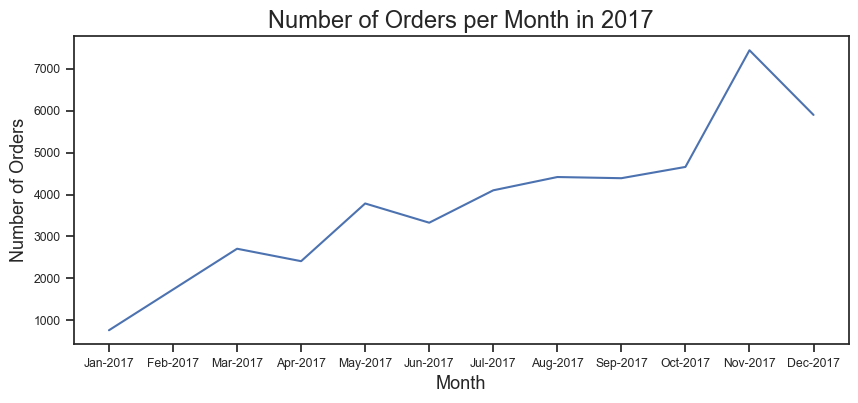

In [197]:
orders_2017 = call_monthly_order(order_monthly,2017)

The graph shows the number of orders per month in 2017. The number of orders has been increasing steadily over the year, with the highest number of orders in November. This suggests that the business is growing and that there is strong demand for its products or services.

### Now we start with daily orders trend

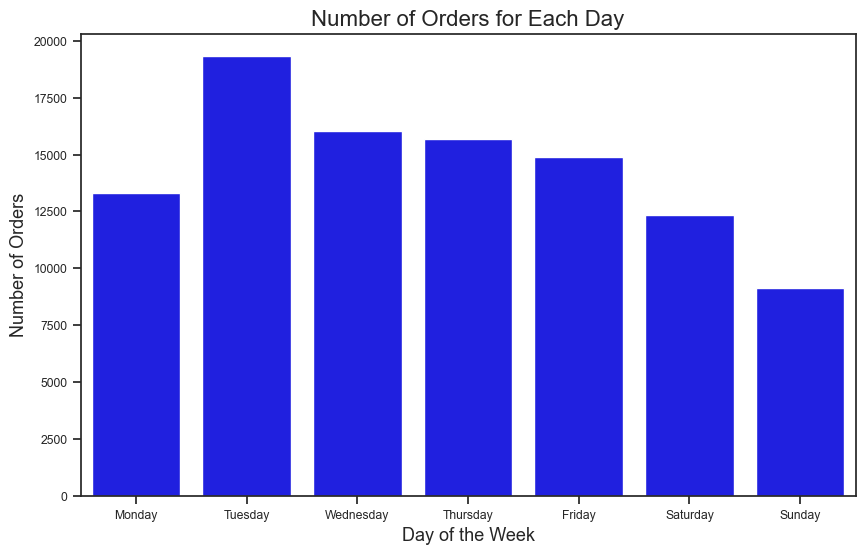

  order_approved_at  num_of_orders
0            Monday          13294
1           Tuesday          19341
2         Wednesday          16040
3          Thursday          15677
4            Friday          14885
5          Saturday          12354
6            Sunday           9142


In [198]:
order_daily = df_full[['order_approved_at']].groupby(df_full['order_approved_at'].dt.dayofweek.sort_index()).count()
daily_trend_index = order_daily.rename(columns={'order_approved_at': 'num_of_orders'})
daily_trend = daily_trend_index.reset_index()

dow = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for i in range(7):
    daily_trend['order_approved_at'] = daily_trend['order_approved_at'].replace(i, dow[i])

# Optional: If you want to sort days of the week in a specific order
# daily_trend['order_approved_at'] = pd.Categorical(daily_trend['order_approved_at'], categories=dow, ordered=True)

# Plotting
plt.figure(figsize=(10, 6))
sns.set_theme(style="ticks", font_scale=0.8)
daily_trend_viz = sns.barplot(x='order_approved_at', y='num_of_orders', data=daily_trend, color='blue')
daily_trend_viz.set_xlabel('Day of the Week', fontsize=13)
daily_trend_viz.set_ylabel('Number of Orders', fontsize=13)
plt.title('Number of Orders for Each Day', fontsize=16)
plt.show()

# Display the processed DataFrame
print(daily_trend)


1. **Weekly Activity:**
   - Tuesday has the highest count (19341), indicating a peak in whatever activity is being measured on that day.
   - Sunday has the lowest count (9142), suggesting relatively lower activity compared to other days.

2. **Midweek Engagement:**
   - Wednesday (16040) and Thursday (15677) show solid engagement, making them noteworthy for certain analyses or interventions.

3. **Weekend Trends:**
   - Saturday (12354) and Friday (14885) have lower counts compared to weekdays but still demonstrate notable activity.

4. **Insights and Planning:**
   - Understanding the variation in daily activity can inform strategic decisions. For example, marketing efforts or promotions could be timed to capitalize on the higher engagement days.


### Now check the payment type

In [199]:
# Group by 'payment_type' and count occurrences
payment_count_index = df_full[['payment_type']].groupby(df_full['payment_type']).count()

# Rename the column to 'num_of_payment'
payment_count_index = payment_count_index.rename(columns={'payment_type': 'num_of_payment'})

# Reset the index to create a DataFrame with payment types and their respective counts
payment_count = payment_count_index.reset_index()
payment_count

,payment_type,num_of_payment
0,boleto,19177
1,credit_card,74578
2,debit_card,1485
3,voucher,5493


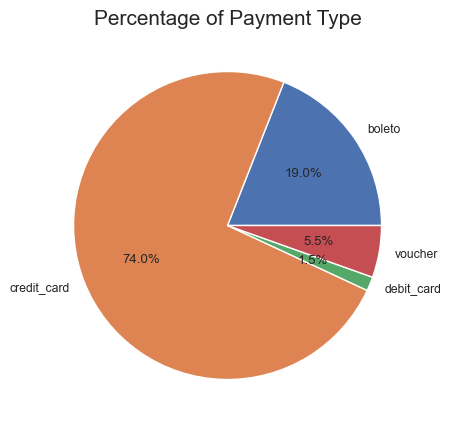

In [200]:
# Extracting labels and data
label = payment_count['payment_type']
data = payment_count['num_of_payment']

# Plotting the pie chart
plt.figure(figsize=(6, 5))
plt.title('Percentage of Payment Type', fontsize=15)
plt.pie(data, labels=label, autopct='%0.1f%%')

# Display the pie chart
plt.show()


Credit cards are the preferred payment method with 74,578 transactions, highlighting their dominance. Boleto payments, while significant at 19,177, are less frequent. Vouchers see moderate use with 5,493 transactions, and debit cards are the least utilized at 1,485. Businesses might focus on optimizing services for credit card users but could explore strategies to encourage diverse payment methods for a more balanced revenue approach.

## Overall Insights

1. **Sales Growth:**
   - Significant sales growth was observed in 2017, indicating a positive trend in business performance during that period.

2. **June 2018 Drop:**
   - Noteworthy is a sales drop in June 2018, suggesting a potential issue or external factor affecting sales during that specific month.

3. **Customer Ordering Preferences:**
   - Tuesdays are the peak for customer orders, indicating a preferred day for transactions. In contrast, Sundays show the least customer activity, suggesting a less favorable day for purchases.

4. **Payment Preferences:**
   - Credit cards are the most preferred payment method, highlighting customer trust and convenience.
   - Debit cards have the lowest usage, comprising only 1% of over 100k orders. This indicates a clear preference for credit cards over debit cards among customers.

These insights offer valuable information for strategic planning. Further investigation into the June 2018 drop and understanding the factors driving the preference for certain days and payment methods can aid in refining business strategies and optimizing customer experiences.

# Customer Segmentation

In [201]:
# Drop rows with indices specified in out_list
df_clean = df_full.drop(out_list, axis=0)

# Display the first few rows of the cleaned DataFrame
df_clean.head()

,order_id,customer_id,order_approved_at,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,sao paulo,SP,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27,barreiras,BA,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23,vianopolis,GO,1,credit_card,3,179.12


## RFM

RFM score is a customer segmentation model that uses three key metrics to assess customer value:

* **Recency:** How recently did the customer make a purchase?
* **Frequency:** How often does the customer make purchases?
* **Monetary value:** How much money does the customer spend on each purchase?

Customers are assigned a score of 1 to 5 for each metric, with 5 being the highest. The higher the score, the more valuable the customer is.

RFM scores can be used to segment customers into different groups, such as:

* **Loyal customers:** These customers have high recency, frequency, and monetary value scores. They are the most valuable customers to your business.
* **At-risk customers:** These customers have low recency scores, but high frequency and monetary value scores. They are valuable customers, but they may be at risk of churning.
* **New customers:** These customers have high recency and frequency scores, but low monetary value scores. They are new customers who are still learning about your business.
* **Lost customers:** These customers have low recency, frequency, and monetary value scores. They are no longer valuable customers to your business.

Once you have segmented your customers, you can tailor your marketing and sales efforts accordingly. For example, you can send exclusive offers to your loyal customers or offer loyalty rewards to encourage them to keep shopping with you. You can also send targeted marketing messages to your at-risk customers to try to win them back.

RFM scoring is a simple but effective way to segment your customers and assess their value. By understanding your customers' RFM scores, you can make better decisions about how to allocate your marketing and sales resources.

In [202]:
# Group the DataFrame by customer ID.
df_grouped = df_clean.groupby('customer_id')

# Find the maximum order date for each customer ID group.
max_date = df_grouped['order_approved_at'].max().reset_index()

# Rename the 'order_approved_at' column to 'most_recent'.
max_date = max_date.rename({'order_approved_at':'most_recent'},axis = 1)

# Print the head of the DataFrame.
max_date.head()

,customer_id,most_recent
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:35:32
1,000161a058600d5901f007fab4c27140,2017-07-16 09:55:12
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:15:20
3,0002414f95344307404f0ace7a26f1d5,2017-08-17 03:10:27
4,000379cdec625522490c315e70c7a9fb,2018-04-04 03:10:19


In [203]:
# This code calculates the recency score for each customer in a Pandas DataFrame.

# Add a new column called 'r_score' to the DataFrame.
max_date['r_score'] = (max_date['most_recent'].max() - max_date['most_recent']).dt.days

# Print the head of the DataFrame.
max_date.head()

,customer_id,most_recent,r_score
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:35:32,287
1,000161a058600d5901f007fab4c27140,2017-07-16 09:55:12,409
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:15:20,547
3,0002414f95344307404f0ace7a26f1d5,2017-08-17 03:10:27,377
4,000379cdec625522490c315e70c7a9fb,2018-04-04 03:10:19,147


The r_score column is calculated by subtracting the most recent order date for each customer from the maximum order date across all customers. This gives us a measure of how recently each customer has made a purchase.

In [204]:
# This code calculates the frequency score for each customer in a Pandas DataFrame.
# Group the DataFrame by customer ID.
df_grouped = df_clean.groupby('customer_id')

# Count the number of orders for each customer ID group.
n_transaction = df_grouped['order_id'].count().reset_index()

# Rename the 'order_id' column to 'f_score'.
n_transaction = n_transaction.rename({'order_id':'f_score'},axis = 1)

# Print the head of the DataFrame.
n_transaction.head()

,customer_id,f_score
0,00012a2ce6f8dcda20d059ce98491703,1
1,000161a058600d5901f007fab4c27140,1
2,0001fd6190edaaf884bcaf3d49edf079,1
3,0002414f95344307404f0ace7a26f1d5,1
4,000379cdec625522490c315e70c7a9fb,1


In [205]:
# This code calculates the monetary score for each customer in a Pandas DataFrame.

# Group the DataFrame by customer ID.
df_grouped = df_clean.groupby('customer_id')

# Calculate the average payment value for each customer ID group.
avg_purchase = df_grouped['payment_value'].mean().reset_index()

# Rename the 'payment_value' column to 'm_score'.
avg_purchase = avg_purchase.rename({'payment_value':'m_score'},axis = 1)

# Print the head of the DataFrame.
avg_purchase.head()

,customer_id,m_score
0,00012a2ce6f8dcda20d059ce98491703,114.74
1,000161a058600d5901f007fab4c27140,67.41
2,0001fd6190edaaf884bcaf3d49edf079,195.42
3,0002414f95344307404f0ace7a26f1d5,179.35
4,000379cdec625522490c315e70c7a9fb,107.01


m_score, or monetary score, is a measure of how much money a customer spends on average. It is calculated by dividing the total spend by the number of purchases. m_score can be used to identify high-value customers, at-risk customers, and segment customers into different groups.

In [206]:
# Count the number of unique customer IDs
num_unique_customers = avg_purchase['customer_id'].nunique()

# Print the number of unique customer IDs
print(num_unique_customers)


88893



There are 88,893 unique customer IDs in the avg_purchase DataFrame. This means that there are 88,893 unique customers that have made a purchase from the business.

In [207]:
# Merge the max_date, n_transaction, and avg_purchase DataFrames on the customer_id column using a left join.
merge = max_date.merge(n_transaction, how = 'left', on = 'customer_id')
merge = merge.merge(avg_purchase, how = 'left', on = 'customer_id')

# Print the merged DataFrame.
merge

,customer_id,most_recent,r_score,f_score,m_score
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:35:32,287,1,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:55:12,409,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:15:20,547,1,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-17 03:10:27,377,1,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-04 03:10:19,147,1,107.01
...,...,...,...,...,...
88888,fffcb937e9dd47a13f05ecb8290f4d3e,2018-03-17 01:35:21,165,1,91.91
88889,fffecc9f79fd8c764f843e9951b11341,2018-03-29 17:10:27,152,3,27.12
88890,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:54:37,99,1,63.13
88891,ffff42319e9b2d713724ae527742af25,2018-06-13 17:20:23,76,1,214.13


In [208]:
# create new variable with id,r,f,m score column
df_rfm = merge[['customer_id','r_score','f_score','m_score']]
df_rfm

,customer_id,r_score,f_score,m_score
0,00012a2ce6f8dcda20d059ce98491703,287,1,114.74
1,000161a058600d5901f007fab4c27140,409,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,547,1,195.42
3,0002414f95344307404f0ace7a26f1d5,377,1,179.35
4,000379cdec625522490c315e70c7a9fb,147,1,107.01
...,...,...,...,...
88888,fffcb937e9dd47a13f05ecb8290f4d3e,165,1,91.91
88889,fffecc9f79fd8c764f843e9951b11341,152,3,27.12
88890,fffeda5b6d849fbd39689bb92087f431,99,1,63.13
88891,ffff42319e9b2d713724ae527742af25,76,1,214.13


## Now We Using K-Means to Cluster

In [209]:
# Drop the customer_id column
features = df_rfm.drop('customer_id',axis = 1)

# Create a StandardScaler object
scale = StandardScaler()

# Fit the StandardScaler object to the features and transform them to a new scale
features_scaled = scale.fit_transform(features)

# Print the transformed features
print(features_scaled)

[[ 0.31745045 -0.12196184  0.02632091]
 [ 1.11724458 -0.12196184 -0.63555658]
 [ 2.02192974 -0.12196184  1.15457521]
 ...
 [-0.91501919 -0.12196184 -0.69540944]
 [-1.06580005 -0.12196184  1.41622169]
 [ 0.80257148 -0.12196184 -0.94195286]]


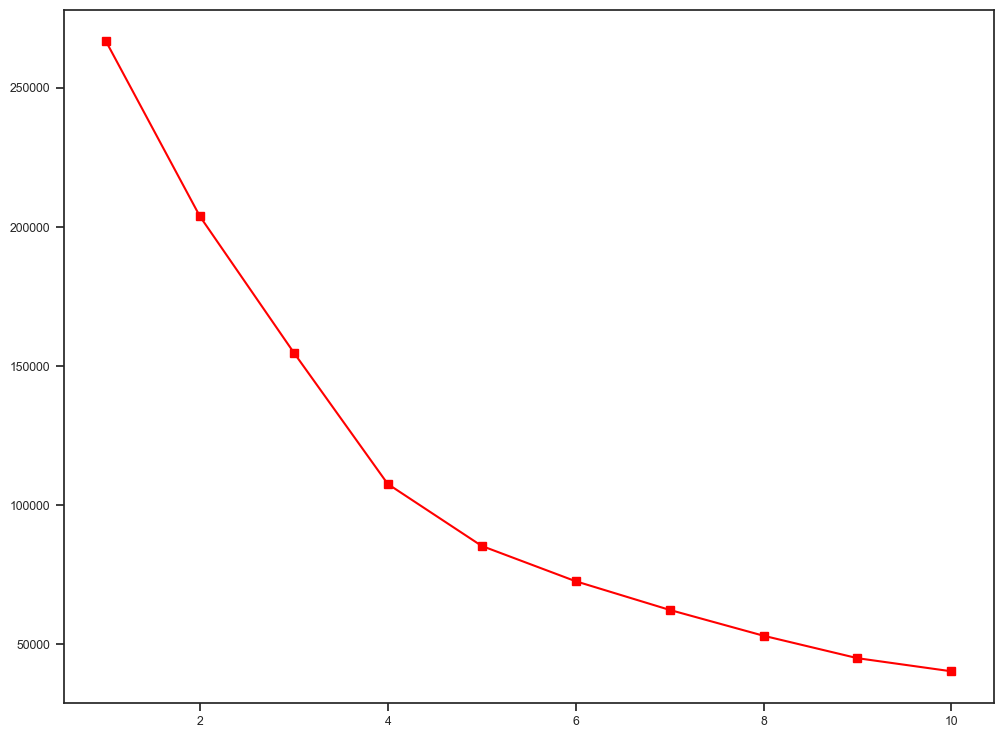

In [210]:
# Calculate the WCSS for different values of k
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++', random_state=1)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the results
plt.figure(figsize=(12,9))
plt.plot(range(1,11), wcss, marker='s', color='red')
plt.show()

In [211]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++',random_state = 1)
kmeans.fit(features_scaled)
df_seg_kmeans = df_rfm.copy()
df_seg_kmeans['segments'] = kmeans.labels_
df_seg_kmeans.head()

,customer_id,r_score,f_score,m_score,segments
0,00012a2ce6f8dcda20d059ce98491703,287,1,114.74,2
1,000161a058600d5901f007fab4c27140,409,1,67.41,2
2,0001fd6190edaaf884bcaf3d49edf079,547,1,195.42,2
3,0002414f95344307404f0ace7a26f1d5,377,1,179.35,1
4,000379cdec625522490c315e70c7a9fb,147,1,107.01,0


In [212]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++',random_state = 1)
kmeans.fit(features_scaled)
df_seg_kmeans = df_rfm.copy()
df_seg_kmeans['segments'] = kmeans.labels_
df_seg_kmeans.head()

,customer_id,r_score,f_score,m_score,segments
0,00012a2ce6f8dcda20d059ce98491703,287,1,114.74,2
1,000161a058600d5901f007fab4c27140,409,1,67.41,2
2,0001fd6190edaaf884bcaf3d49edf079,547,1,195.42,2
3,0002414f95344307404f0ace7a26f1d5,377,1,179.35,1
4,000379cdec625522490c315e70c7a9fb,147,1,107.01,0


In [213]:
df_analysis = df_seg_kmeans.groupby('segments').mean()
df_analysis

,r_score,f_score,m_score
segments,,,
0,140.35,1.04,77.74
1,210.55,1.00,217.88
2,416.32,1.04,88.31
3,278.27,6.14,25.12


In [214]:
df_analysis['#observations'] = df_seg_kmeans[['segments','f_score']].groupby(['segments']).count()
df_analysis['Percentage'] = df_analysis['#observations'] / df_analysis['#observations'].sum()
df_analysis

,r_score,f_score,m_score,#observations,Percentage
segments,,,,,
0,140.35,1.04,77.74,41915,0.47
1,210.55,1.00,217.88,20392,0.23
2,416.32,1.04,88.31,26319,0.30
3,278.27,6.14,25.12,267,0.00


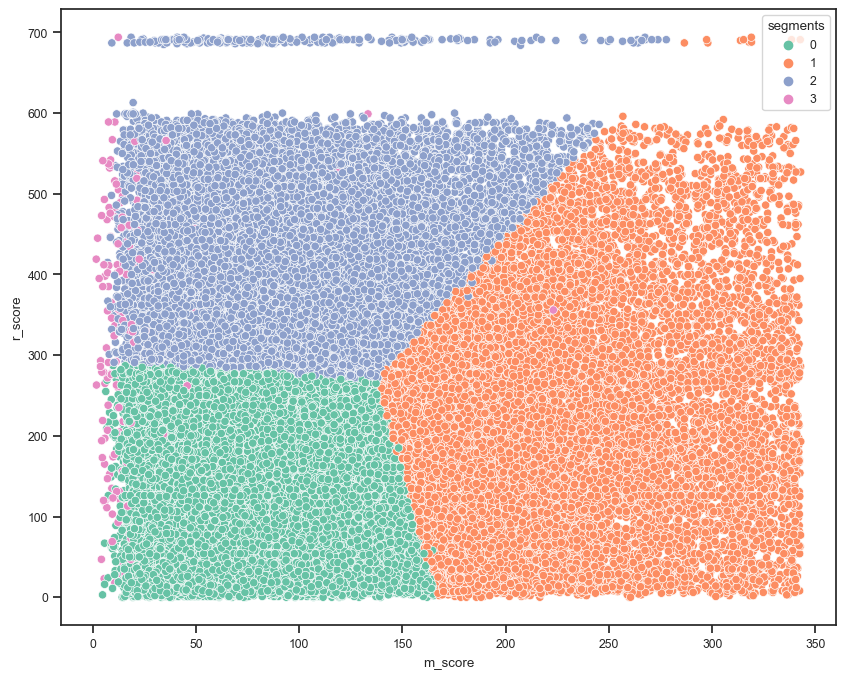

In [215]:
# Create a scatter plot of the recency and monetary scores of the customers, colored by their segment
x_axis = df_seg_kmeans['m_score']
y_axis = df_seg_kmeans['r_score']
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_seg_kmeans['segments'], palette='Set2', legend='full')
plt.show()

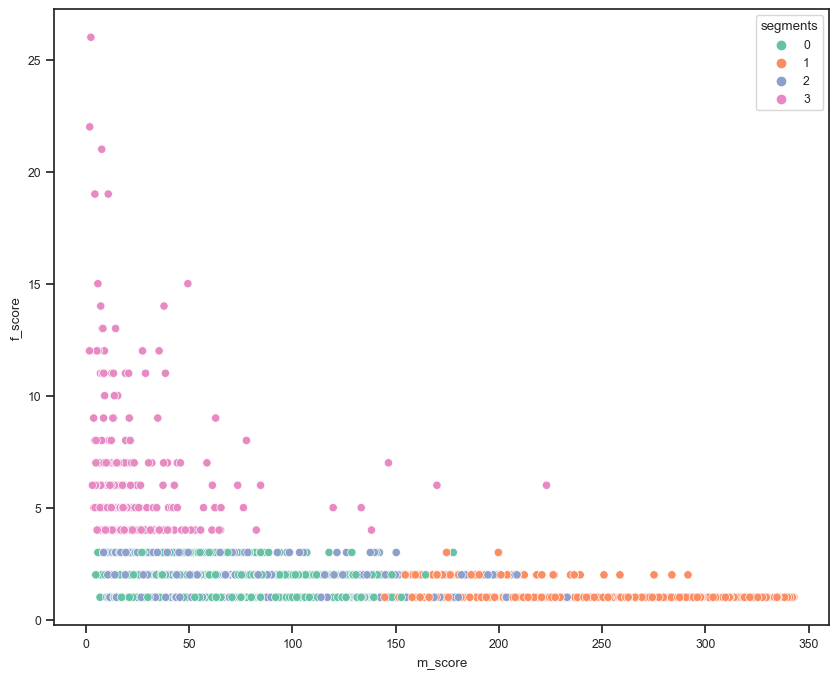

In [216]:
# Create a scatter plot of the monetary score and frequency score of the customers, colored by their segment
x_axis = df_seg_kmeans['m_score']
y_axis = df_seg_kmeans['f_score']
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_seg_kmeans['segments'], palette='Set2', legend='full')
plt.show()

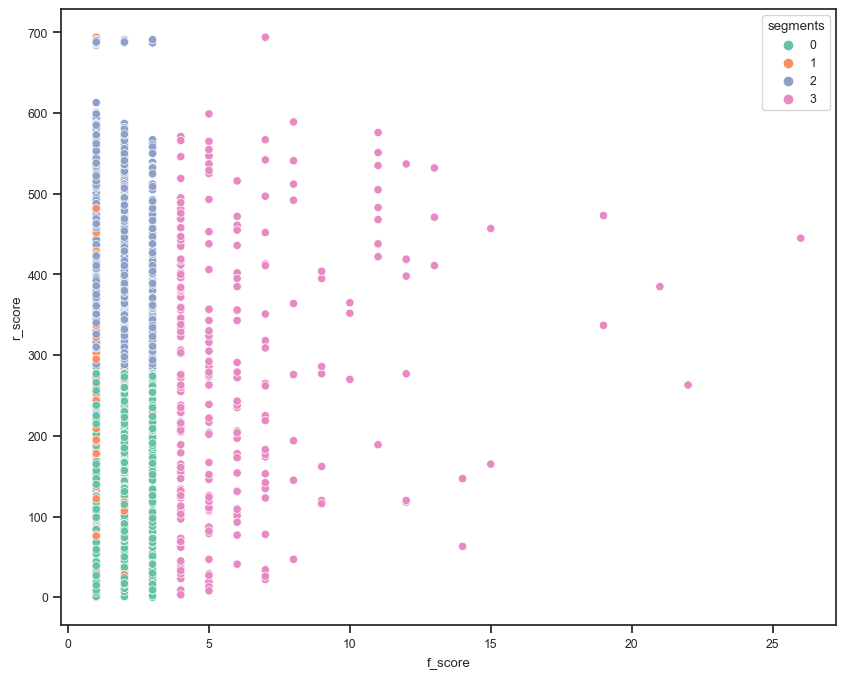

In [217]:
# Create a scatter plot of the frequency and recency scores of the customers, colored by their segment
x_axis = df_seg_kmeans['f_score']
y_axis = df_seg_kmeans['r_score']
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_seg_kmeans['segments'], palette='Set2', legend='full')
plt.show()

In [218]:
df_analysis

,r_score,f_score,m_score,#observations,Percentage
segments,,,,,
0,140.35,1.04,77.74,41915,0.47
1,210.55,1.00,217.88,20392,0.23
2,416.32,1.04,88.31,26319,0.30
3,278.27,6.14,25.12,267,0.00



**Segment 0: Customers with high monetary value**

These are your most valuable customers. They spend the most money with your business, and they are likely to be loyal. You should focus on retaining these customers and increasing their lifetime value.

**Marketing strategies:**

* Offer loyalty programs or VIP rewards to these customers.
* Send them personalized marketing messages with exclusive offers and discounts.
* Make sure they have a positive customer experience every time they interact with your business.
* Upsell and cross-sell them on new products and services that they may be interested in.

**Segment 1: Customers that did transaction recently**

These customers are currently engaged with your business. They are likely to be interested in new products and services, so you should focus on upselling and cross-selling to them.

**Marketing strategies:**

* Send them personalized product recommendations based on their recent purchase history.
* Offer them discounts on related products or services.
* Invite them to participate in beta testing or early access programs for new products.
* Send them exclusive content, such as blog posts, webinars, or e-books, that is relevant to their interests.

**Segment 2: Customers that has not been doing transaction for the longest time**

These customers are inactive, but they may still be interested in your business. You should focus on reactivating them with targeted marketing campaigns.

**Marketing strategies:**

* Send them re-engagement campaigns that remind them about your products or services and offer them incentives to return.
* Offer them exclusive discounts or promotions.
* Personalize your marketing messages to address their specific needs and interests.
* Make it easy for them to purchase from you again by streamlining your checkout process and offering a variety of payment options.

**Segment 3: Customer that did multiple transactions on the site, but only a small number of people are in this segment (less than 1%)**

This segment is too small to be statistically significant, so it is difficult to make general recommendations. However, you may want to consider conducting further research to understand the unique needs and interests of these customers.

**Marketing strategies:**

* Conduct surveys or interviews with these customers to learn more about their motivations and preferences.
* Analyze their purchase history to identify any patterns or trends.
* Use this information to develop targeted marketing campaigns that are specifically tailored to this segment.

